The GitHub link for this Project Planning Report is https://github.com/Matthew-1478088/Individual-Project-Planning-Group-12

# Part 1, Data Description:
There are two datasets that we will be looking at, one with data about all the players that participated in the experiment, with 196 observations, meaning 197 players. The other dataset is a dataset about all the play sessions that the players participated in, with 1535 observations, or play sessions in the dataset. This dataset was collected with a combination of surveys as well as recordings of the start and end times of play sessions. There are 7 variables in the player dataset and 5 in the session dataset, with one variable being shared between them. Some issues with the data in the dataset is due to some info coming from surveys, some data is missing from the player dataset for when participants do not answer some questions, some data could also be biased as a result of coming from a survey, specifically for the variable of experience. might skew the data a lot. The variables of the datasets are shown below:

Player_Data:
| Variable Name     | Data Type | Meaning       |
|:---------|:---:|:-----------:|
| experience    | Character  | Self Reported Experience with Minecraft   |
| subscribe      | Boolean  | Whether they have a subscription or not     |
| hashedEmail  | Character  | Players email encrypted for privacy    | 
| played_hours  | Double  | Total Hours played by the player    |
| name  | Character  | Name of player    |
| gender  | Character  | Gender of player    |
| Age  | Double  | Age of player    |

Session_Data:
| Variable Name     | Data Type | Meaning       |
|:---------|:---:|:-----------:|
| hashedEmail    | Character  |Session players email hashed for privacy     |
| start_time	      | Character  | Start time in a encrypted and time format  |
| end_time  | Character  | End time in a date and time format   | 
| original_start_time  | Double  | Start time in a single number format  |
| original_end_time   | Double  |  End time in a single number format    |


# Part 2, Questions:
The Broad Question that is being focused on is Question 2: We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts. The more specific question that i am focusing on is the quesstion Can experience, gender, and age be used to predict play time of participants. The data will help me answer this question because the player dataset has the play times, gender, age, and experience of all the participants, so the data can be used to form a regression algorithm in order to predict the play time from the other variables. not much data wrangling will need to be done, other than cleaning up missing values and dropping unnessecary columns, the session data will also be left unused.

# Part 3, Exploratory Data Analysis and Visualization:

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
player_data <- read_csv("https://raw.githubusercontent.com/Matthew-1478088/Individual-Project-Planning-Group-12/refs/heads/main/players.csv")
session_data <- read_csv("https://raw.githubusercontent.com/Matthew-1478088/Individual-Project-Planning-Group-12/refs/heads/main/sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
player_data
session_data

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [4]:
mean <- data.frame(variables = c('played_hours', 'Age'),
                 mean = c(mean(player_data$played_hours, na.rm=TRUE),
                         mean(player_data$Age, na.rm=TRUE)))
mean

variables,mean
<chr>,<dbl>
played_hours,5.845918
Age,21.139175


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


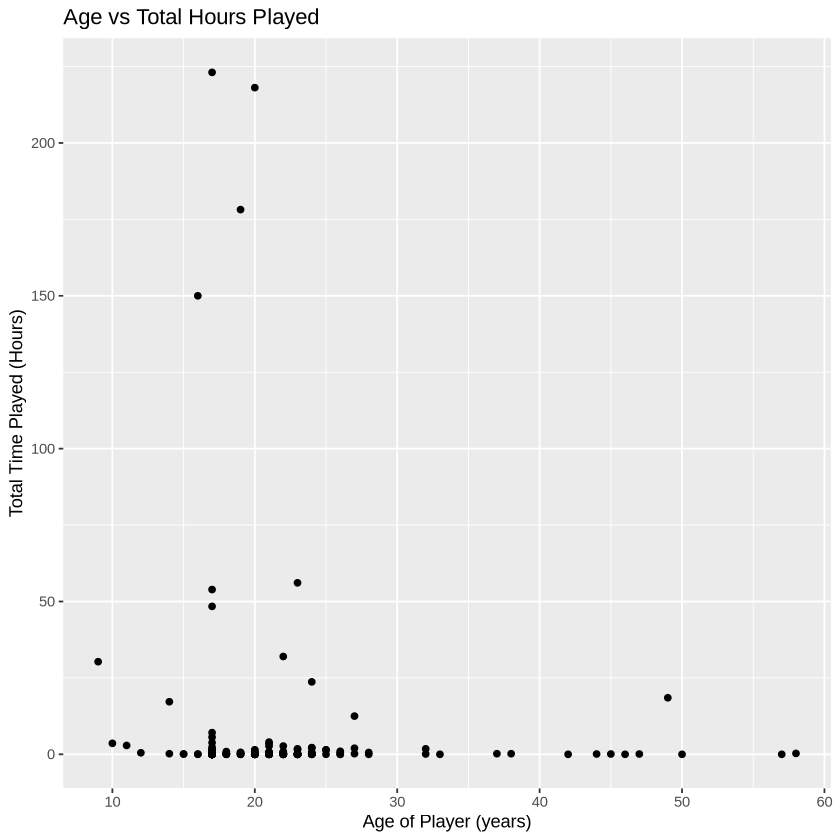

In [26]:
age_plot <- player_data |>
                ggplot(aes(x = Age, y = played_hours)) +
                geom_point() +
                xlab("Age of Player (years)") +
                ylab("Total Time Played (Hours)") +
                labs(title = "Age vs Total Hours Played")
age_plot

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


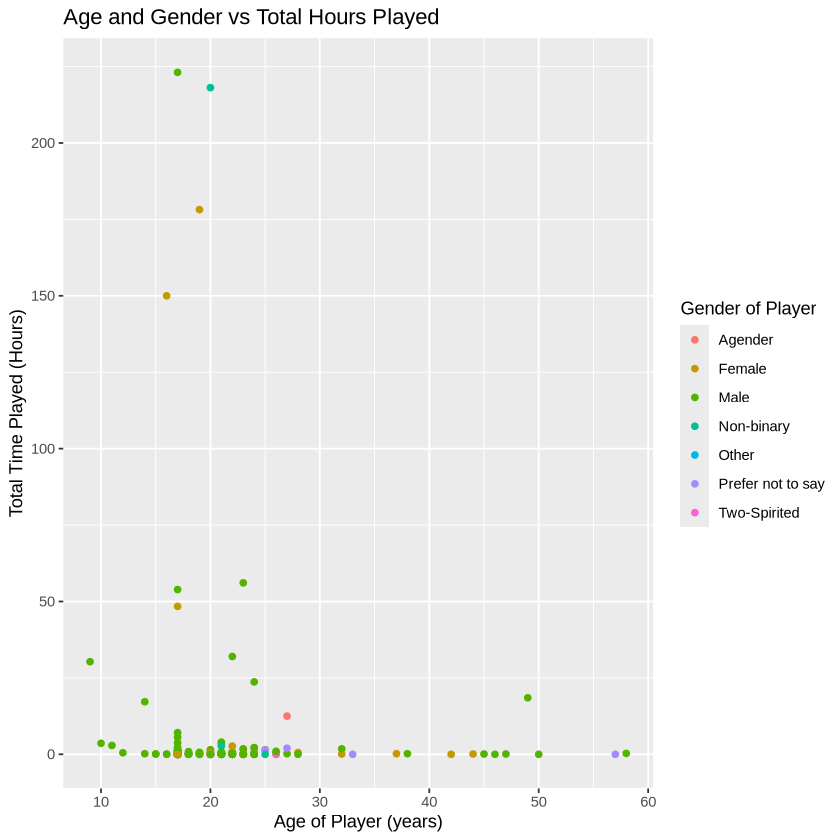

In [34]:
age_gender_plot <- player_data |>
                ggplot(aes(x = Age, y = played_hours)) +
                geom_point(aes(colour = gender)) +
                xlab("Age of Player (years)") +
                ylab("Total Time Played (Hours)") +
                labs(color = "Gender of Player", title = "Age and Gender vs Total Hours Played")
age_gender_plot

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


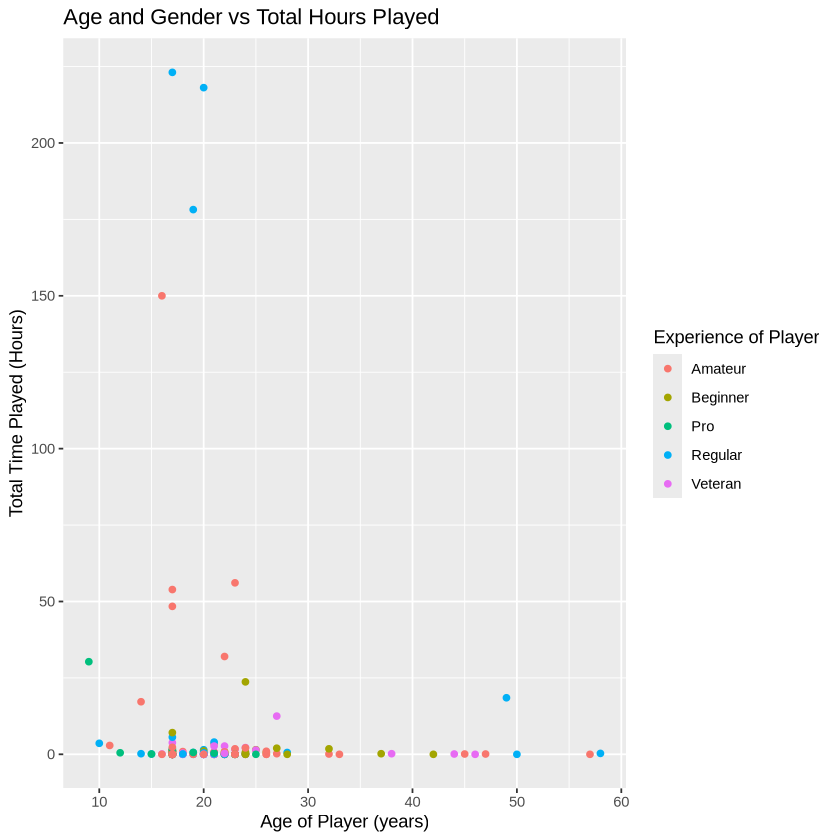

In [35]:
age_experience_plot <- player_data |>
                ggplot(aes(x = Age, y = played_hours)) +
                geom_point(aes(colour = experience)) +
                xlab("Age of Player (years)") +
                ylab("Total Time Played (Hours)") +
                labs(color = "Experience of Player", title = "Age and Gender vs Total Hours Played")
age_experience_plot

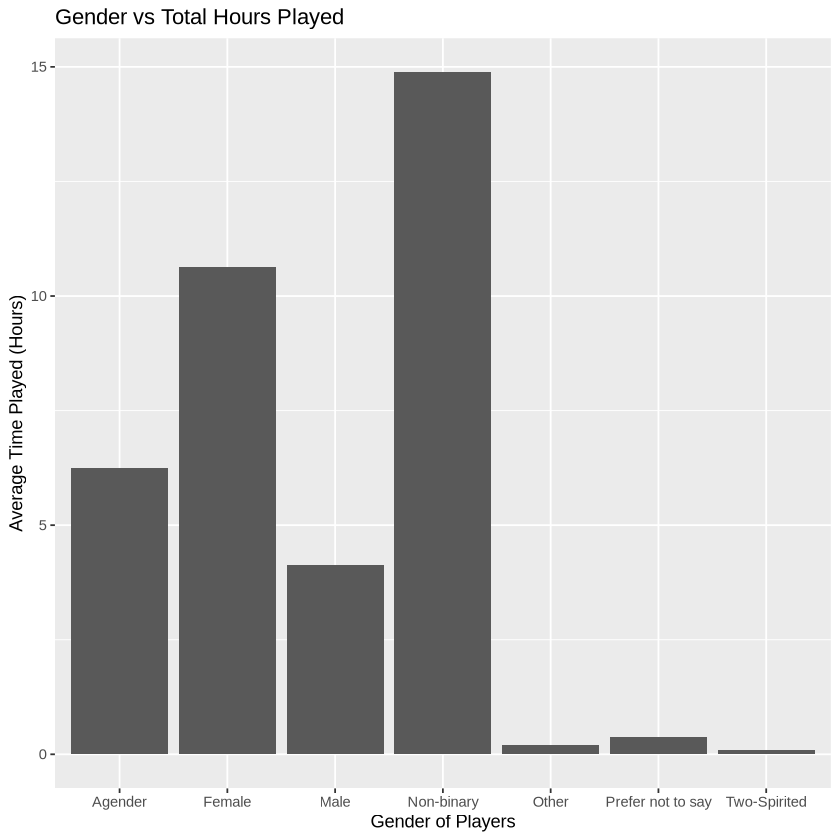

In [27]:
gender_plot <- player_data |>
                group_by(gender) |>
                summarise(mean = mean(played_hours)) |>
                ggplot(aes(x = gender, y = mean)) +
                geom_bar(stat = "Identity") +
                xlab("Gender of Players") +
                ylab("Average Time Played (Hours)") +
                labs(title = "Gender vs Average Hours Played")
gender_plot

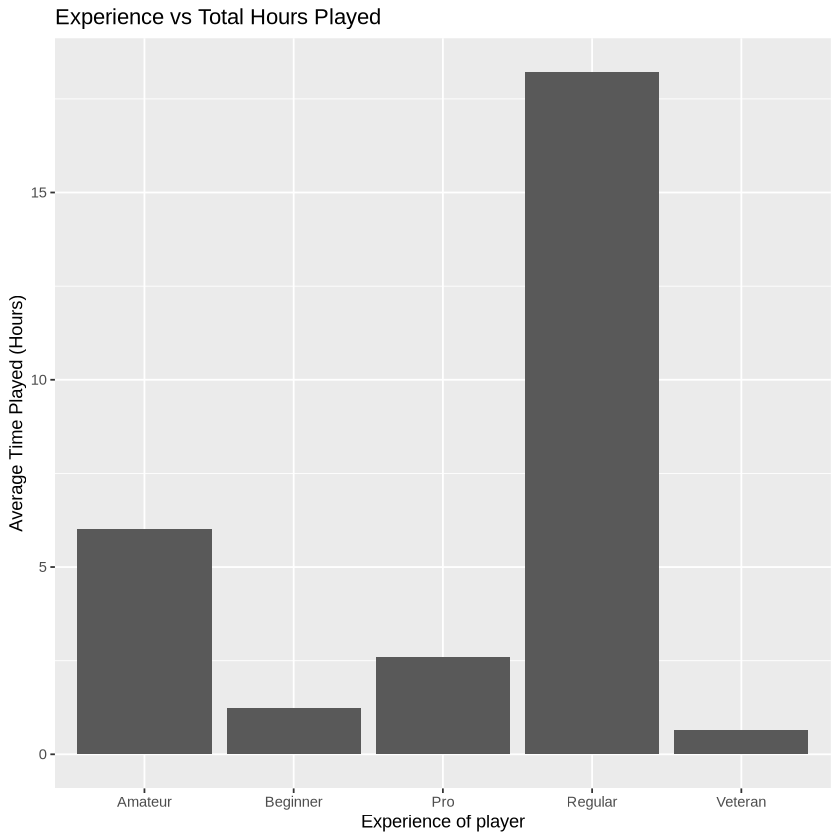

In [31]:
experience_plot <- player_data |>
                group_by(experience) |>
                summarise(mean = mean(played_hours)) |>
                ggplot(aes(x = experience, y = mean)) +
                geom_bar(stat= "Identity") +
                xlab("Experience of player") +
                ylab("Average Time Played (Hours)") +
                labs(title = "Experience vs Average Hours Played")
experience_plot

some insights from the plots i have made is that there are relationships between age, experience, and gender, and total time played, so it is likely possible to predict play time using those three variables. other insights from the age vs time played plot i made are that a lot of players have a low playtime of 0 or 1 hours, and also that there are a couple of players who have a play time much higher than the other players in the data set, with play times of around 200 hours, depending on the model used, these outliers could potentially affect the predictions of the model significantly.